## Loading data

In [6]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

with open('/content/drive/My Drive/Colab Notebooks/Ments/19. Backpropagation/data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


## Computational graph

<img src='https://i.imgur.com/seSGbNS.png'>


*  If you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]. 
*  The final output of this graph is a value L which is computed as (Y-Y')^2 

# Implementation of Forward and Backword propagation

## Forward propagation

In [7]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

## Function to compute forward propagation 
def forward_propagation(x, y, w):
  output = {} ## 'output' to store 19 intermediate outputs
  
  output['Out_0'] = w[0] * x[0]; 
  output['Out_1'] = w[1] * x[1]; 
  output['Out_2'] = w[2] * x[2]; 
  output['Out_3'] = w[3] * x[3]; 
  output['Out_4'] = w[4] * x[4];
  output['Out_5'] = output['Out_0'] + output['Out_1']; 
  output['Out_6'] = output['Out_0'] + output['Out_1']; 
  output['Out_7'] = output['Out_5'] * output['Out_6']; 
  output['Out_8'] = output['Out_7'] + w[5];
  output['Out_9'] = np.exp(output['Out_8']); 
  output['Out_10'] = output['Out_9'] + w[6]; 
  output['Out_11'] = np.tanh(output['Out_10']); 
  output['Out_12'] = np.sin(output['Out_2']); 
  output['Out_13'] = output['Out_3'] + output['Out_4']; 
  output['Out_14'] = output['Out_12'] * output['Out_13']; 
  output['Out_15'] = output['Out_14'] + w[7];
  output['Out_16'] = sigmoid(output['Out_15']); 
  output['Out_17'] = output['Out_16'] * w[8];
  output['Out_18'] = output['Out_11'] + output['Out_17'];

  y_hat = output['Out_18']
  L = (y-y_hat)**2

  output['y_hat'] = y_hat
  output['L'] = L

  func = np.tanh( w[6] + np.exp( w[5] + ((w[0]*x[0] + w[1]*x[1])**2) ) ) + ( sigmoid( w[7] + ( np.sin(w[2]*x[2]) * (w[3]*x[3]+w[4]*x[4]) ) ) * w[8] )
  #func =  np.tanh( np.exp( (w[0]*x[0] + w[1]*x[1]) * (w[0]*x[0] + w[1]*x[1]) ) + w[6] ) + ( sigmoid(( np.sin(w[2]*x[2]) * (w[3]*x[3]+w[4]*x[4]) ) + w[7] ) * w[8] )
  L_func = (y-func)**2

  #print(L, L_func)
  return output
  

#x = np.random.randint(-2,2,size=5); y = 1.0; w = np.random.randn(9)
#forward_propagation(X[0], y[0], W)

## Backward propagation

In [8]:
## Function to compute backward propagation 
def backward_propagation(L,W,dic,x,y):
  
  d_dict = {
      'd_O18_by_O11': 1, 
      'd_O11_by_O10': (1 - (np.tanh(dic['Out_10']))**2), 
      'd_O10_by_O9' : 1, 
      'd_O9_by_O8'  : np.exp(dic['Out_8']), 
      'd_O8_by_O7'  : 1, 
      'd_O7_by_O5'  : dic['Out_6'], 
      'd_O5_by_O0'  : 1, 
      'd_O0_by_w0'  : x[0],
      'd_O7_by_O6'  : dic['Out_5'], 
      'd_O6_by_O0'  : 1, 
      'd_O5_by_O1'  : 1, 
      'd_O1_by_w1'  : x[1], 
      'd_O6_by_O1'  : 1, 

      'd_O18_by_O17' : 1, 
      'd_O17_by_O16' : W[8], 
      'd_O16_by_O15' : sigmoid(dic['Out_15']) * (1 - sigmoid(dic['Out_15'])),
      'd_O15_by_O14' : 1,
      'd_O14_by_O12' : dic['Out_13'],
      'd_O12_by_O2'  : np.cos(dic['Out_2']),
      'd_O2_by_w2'   : x[2],
      'd_O14_by_O13' : dic['Out_12'],
      'd_O13_by_O3'  : 1, 
      'd_O3_by_w3'   : x[3], 
      'd_O13_by_O4'  : 1, 
      'd_O4_by_w4'   : x[4],

      'd_O8_by_w5'   : 1,
      'd_O10_by_w6'   : 1,
      'd_O15_by_w7'   : 1,
      'd_O17_by_w8'   : dic['Out_16']

  }

  d_18_by_7 = d_dict['d_O18_by_O11'] * d_dict['d_O11_by_O10'] * d_dict['d_O10_by_O9'] * d_dict['d_O9_by_O8'] * d_dict['d_O8_by_O7']
  d_18_by_w0 = d_18_by_7  * (d_dict['d_O7_by_O5'] * d_dict['d_O5_by_O0'] * d_dict['d_O0_by_w0'] + d_dict['d_O7_by_O6'] * d_dict['d_O6_by_O0'] * d_dict['d_O0_by_w0'] )    
  dw0 = -2 * (y-dic['y_hat']) * d_18_by_w0


  d_18_by_w1 = d_18_by_7 * (d_dict['d_O7_by_O5'] * d_dict['d_O5_by_O1'] * d_dict['d_O1_by_w1'] + d_dict['d_O7_by_O6'] * d_dict['d_O6_by_O1'] * d_dict['d_O1_by_w1'] )
  dw1 = -2 * (y-dic['y_hat']) * d_18_by_w1


  d_18_by_14 = d_dict['d_O18_by_O17'] * d_dict['d_O17_by_O16'] * d_dict['d_O16_by_O15'] * d_dict['d_O15_by_O14'] 
  d_18_by_w2 = d_18_by_14 * (d_dict['d_O14_by_O12'] * d_dict['d_O12_by_O2'] * d_dict['d_O2_by_w2'])
  dw2 = -2 * (y-dic['y_hat']) * d_18_by_w2

  d_18_by_w3 = d_18_by_14 * (d_dict['d_O14_by_O13'] * d_dict['d_O13_by_O3'] * d_dict['d_O3_by_w3'])
  dw3 = -2 * (y-dic['y_hat']) * d_18_by_w3

  d_18_by_w4 = d_18_by_14 * (d_dict['d_O14_by_O13'] * d_dict['d_O13_by_O4'] * d_dict['d_O4_by_w4'])
  dw4 = -2 * (y-dic['y_hat']) * d_18_by_w4

  d_18_by_w5 = d_dict['d_O18_by_O11'] * d_dict['d_O11_by_O10'] * d_dict['d_O10_by_O9'] * d_dict['d_O9_by_O8'] * d_dict['d_O8_by_w5']
  dw5 = -2 * (y-dic['y_hat']) * d_18_by_w5

  d_18_by_w6 = d_dict['d_O18_by_O11'] * d_dict['d_O11_by_O10'] * d_dict['d_O10_by_w6']
  dw6 = -2 * (y-dic['y_hat']) * d_18_by_w6

  d_18_by_w7 = d_dict['d_O18_by_O17'] * d_dict['d_O17_by_O16'] * d_dict['d_O16_by_O15'] * d_dict['d_O15_by_w7']
  dw7 = -2 * (y-dic['y_hat']) * d_18_by_w7

  d_18_by_w8 = d_dict['d_O18_by_O17'] * d_dict['d_O17_by_w8']
  dw8 = -2 * (y-dic['y_hat']) * d_18_by_w8

  dW = {
      'dw0':dw0,
      'dw1':dw1,
      'dw2':dw2,
      'dw3':dw3,
      'dw4':dw4,
      'dw5':dw5,
      'dw6':dw6,
      'dw7':dw7,
      'dw8':dw8
  }
  return dW


#print(out['L'],w,out)
#backward_propagation(out['L'],w,out)

## Using the above functions to train a neural network.

In [9]:
epochs = 100
no_of_weights = 9
mu, sigma = 0, 0.1 # mean and standard deviation
learning_rate = 0.0001
W = np.random.normal(mu, sigma, 9) ## initializing weights 

In [10]:

fin_loss_list = []
for epoch in range(epochs):
  loss_list = []
  for i in range(len(X)):
    out = forward_propagation(X[0], y[0], W)
    loss_list.append(out['L'])

    dws = backward_propagation(out['L'],W,out,X[0], y[0])
    back_prop_gradients = []
    for k,v in dws.items():
      back_prop_gradients.append(v)

    for j in range(len(back_prop_gradients)):
      W[j] = W[j] - learning_rate * back_prop_gradients[j]
  
  MSE = np.mean(loss_list)
  fin_loss_list.append(MSE)

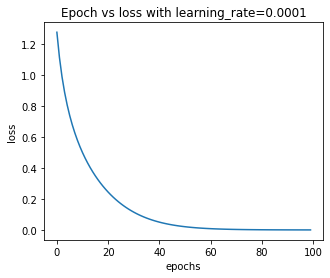

In [11]:
fin_loss_list_vanilla = fin_loss_list
plt.figure(figsize=(5,4))
plt.title('Epoch vs loss with learning_rate={learning_rate}'.format(learning_rate=learning_rate))
plt.xlabel('epochs')
plt.ylabel('loss')
sns.lineplot(x=range(epochs), y=fin_loss_list_vanilla)
plt.show()